In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

In [19]:
weather_meta = pd.read_csv('C:/Users/carro/OneDrive/Escritorio/CUNEF/Visualización/datos-metereologicos-2021-metadatos.csv')
weather_raw = pd.read_csv('C:/Users/carro/OneDrive/Escritorio/CUNEF/Visualización/datos-metereologicos-2021.csv')

In [20]:
weather = (weather_raw
           .assign(**{'fecha': lambda df: pd.to_datetime(df['fecha'])})
           .assign(**{'mes': lambda df: df['fecha'].dt.month})
           .assign(**{'tmed': lambda df: df['tmed'].str.replace(',', '.').astype(float)})
           .assign(**{'tmax': lambda df: df['tmax'].str.replace(',', '.').astype(float)})
           .assign(**{'tmin': lambda df: df['tmin'].str.replace(',', '.').astype(float)})
           .assign(
                prec=lambda d: pd.to_numeric(
                d['prec'].astype(str).str.replace(',', '.', regex=False),
                errors='coerce'
            ).fillna(0.0))
           )

¿Cómo se distribuyen las temperaturas medias diarias en todas las estaciones?

c:\Users\carro\anaconda3\envs\cunef\Lib\site-packages\plotnine\layer.py:293: PlotnineWarning: stat_bin : Removed 3077 rows containing non-finite values.


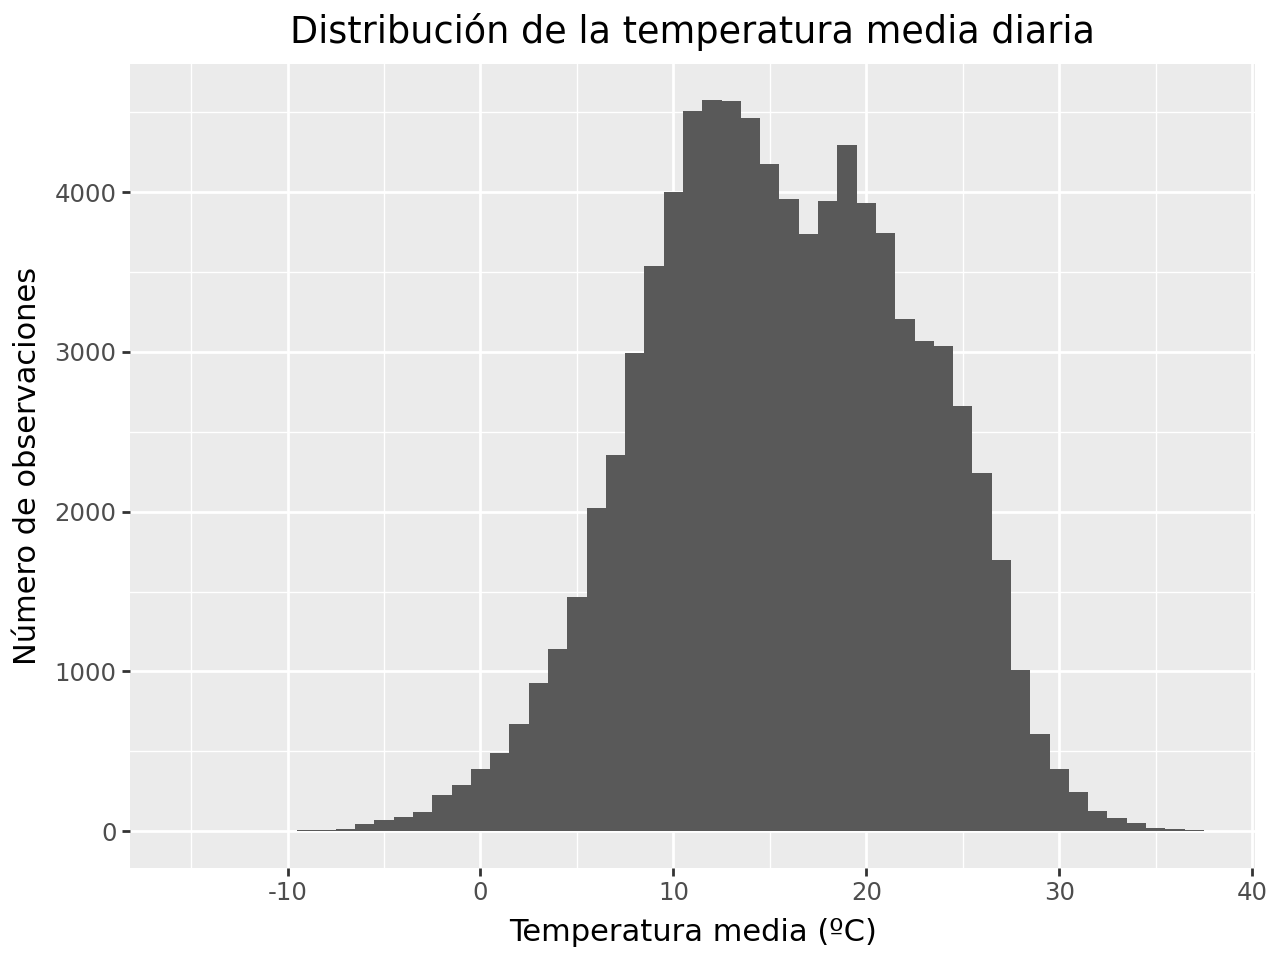

In [21]:
(
    ggplot(weather, aes(x='tmed')) +
    geom_histogram(binwidth=1) +
    labs(
        title='Distribución de la temperatura media diaria',
        x='Temperatura media (ºC)',
        y='Número de observaciones'
    )
)

¿Cómo se distribuye la amplitud térmica (diferencia entre máxima y mínima) a lo largo de los días y estaciones?

c:\Users\carro\anaconda3\envs\cunef\Lib\site-packages\plotnine\layer.py:293: PlotnineWarning: stat_bin : Removed 3077 rows containing non-finite values.


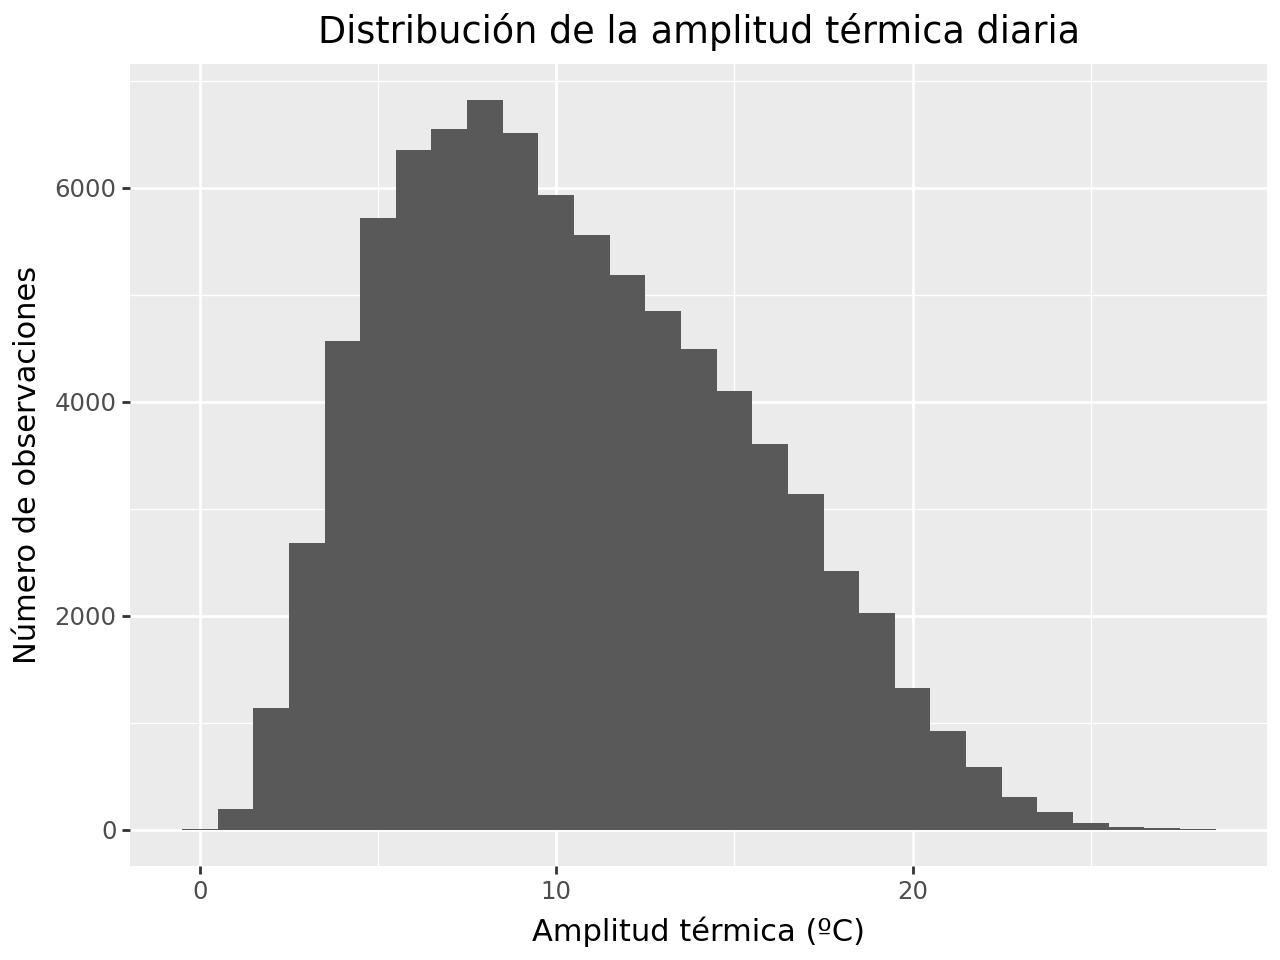

In [22]:
weather = weather.assign(
    amp_termica=lambda df: df['tmax'] - df['tmin']
)

(
    ggplot(weather, aes(x='amp_termica')) +
    geom_histogram(binwidth=1) +
    labs(
        title='Distribución de la amplitud térmica diaria',
        x='Amplitud térmica (ºC)',
        y='Número de observaciones'
    )
)